# Exercise 2: Data Preparation

---
**Written by Hendi Lie (h2.lie@qut.edu.au) and Richi Nayak (r.nayak@qut.edu.au). All rights reserved.**

Welcome to the second practical exercise for IFN645. Each exercise sheet contains a number of theoretical and programming exercises, designed to strengthen both conceptual and practical understanding of data mining processes in this unit.

To answer conceptual questions, write the answer to each question on a paper/note with your reasoning. For programming exercises, open your iPython console/Jupyter notebook and use Python commands/libraries introduced in each practical to answer the questions. In many cases, you will need to write code to support your conceptual answers.

## 0. Prequisite

Perform the following steps before trying the exercises:
1. Import pandas as "pd" and load the house price dataset into "df".
2. Print dataset information to refresh your memory.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('datasets/melbourne_house_price.csv', index_col=0)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 22 columns):
Suburb                24197 non-null object
Address               24197 non-null object
Rooms                 24197 non-null int64
Type                  24197 non-null object
Price                 24197 non-null float64
Method                24197 non-null object
SellerG               24197 non-null object
Date                  24197 non-null object
Distance              24196 non-null float64
Postcode              24196 non-null float64
Bedroom2              18673 non-null float64
Bathroom              18669 non-null float64
Car                   18394 non-null float64
Landsize              15946 non-null float64
BuildingArea          9609 non-null float64
YearBuilt             10961 non-null float64
CouncilArea           24194 non-null object
Lattitude             18843 non-null float64
Longtitude            18843 non-null float64
Regionname            24194 non-null object
Pr

## 1. Exploring data

Perform following operations and answer the following questions:
1. Describe the key statistics of "Rooms" column. What is the mean and median (50% quantile) value of this column?
2. Bin the "Distance" column into 10 bins. How many houses are in each bin?
3. How many unique values are in "Method" column? What is the number of occurences for each of these unique values?
4. Assume **Price_above_median** is a binary variable of whether a house is priced above the median ($875,000) and **Type** is a categorical variable representing type of the property (house/unit/townhouse). What is the correlation between property type and price above median in this dataset? *Hint: use groupby.*

In [7]:
print(df['Rooms'].describe())

count    24197.000000
mean         2.979874
std          0.960262
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: Rooms, dtype: float64


In [8]:
print(df['Distance'].value_counts(bins=10))

(9.62, 14.43]      7857
(4.81, 9.62]       7683
(-0.0491, 4.81]    3476
(14.43, 19.24]     2817
(19.24, 24.05]     1209
(24.05, 28.86]      541
(28.86, 33.67]      271
(33.67, 38.48]      265
(43.29, 48.1]        59
(38.48, 43.29]       18
Name: Distance, dtype: int64


In [9]:
print(df['Method'].unique())

['S' 'SP' 'PI' 'VB' 'SA']


In [10]:
print(df['Distance'].unique())

[ 2.5 13.5  3.3  6.4 13.8 11.1  6.3  5.9 11.  12.2 10.5  6.6  9.7  9.2
 13.  13.9 13.1 10.8 11.2 10.7  5.2 11.8 11.7  7.8  9.   3.2 11.4  8.9
  8.1  9.3 13.6  3.4  1.6 10.3  8.5  7.7  8.   9.4  5.8  3.5  4.4 12.1
 13.7 14.5  4.6  7.9 15.  12.8  4.2  5.6  7.5  6.2  7.4  8.7  2.8  4.1
  6.9 14.6  8.4  2.3  5.5 11.5 14.7  2.6  9.9  3.8  4.5  8.8  2.1  1.2
  6.1 12.6 13.3  6.5 14.9  1.9  5.1  7.   9.1  9.5  1.8  1.5  9.8 12.4
 10.6  8.2 10.9 10.4 14.  12.5  5.3 12.7  3.7  3.   5.7  4.3 10.2 16.5
 23.2 17.3 35.2 13.4 25.  16.1  4.  14.8 10.1 17.9  3.6 43.4  6.7 20.6
 34.7 23.  24.7 21.8 22.2 14.3 25.9 27.  18.   7.2 19.6 28.8 24.8 15.4
 38.  36.9 45.9 12.9  7.3 16.7 20.4 32.3 45.2 16.  18.4 12.3 15.5  5.4
 25.2 16.3 33.8 31.7 29.8 20.  17.2 16.2 21.5 14.2 34.1 22.7 12.   2.4
 19.9 21.3 23.8 23.5 15.2 35.4 20.5  2.7 20.8  5.  30.4 15.3 17.6 25.5
 27.2 31.2 17.5  2.   0.  26.5 18.8 47.3  0.7 21.1 23.6  3.1  6.8 34.9
  1.3 18.7 41.  39.8  8.6 27.1 17.4 26.  31.6 47.4 34.6 27.7 33.3 23.3
 29.3 

In [22]:
temp = df
temp['Counter'] = 1
temp.groupby(['Type'])['Price_above_median', 'Counter'].sum()

,Price_above_median,Counter
Type,,
h,10293,16303
t,1172,2545
u,617,5349


## 2. Plotting

Perform the following operations using `matplotlib.pyplot` and `seaborn`. Be mindful of each column type.
1. Create a distribution plot for "Distance" column.
2. Create a distribution plot for "Type" column.
3. Create a distribution plot for "Rooms", grouped by the property type.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

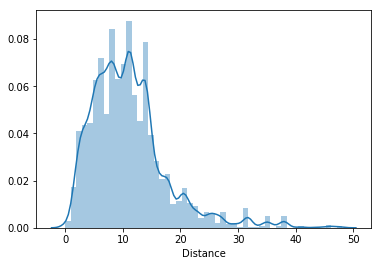

In [12]:
d1 = sns.distplot(df['Distance'].dropna())
plt.show()

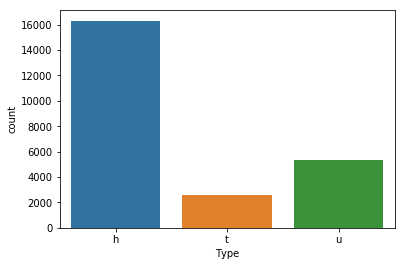

In [13]:
d2 = sns.countplot(data=df, x='Type')
plt.show()

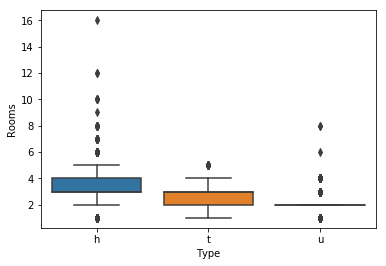

In [15]:
ax = sns.boxplot(x="Type", y="Rooms", data=df)
plt.show()

## 3. Correcting errors in data

Perform the following operations and answer the following questions:
1. By performing data exploration, grouping and plotting, what problems have you revealed with the dataset?
2. Do you think **Address** column is useful for the predictive model? Why?
3. Impute missing values in **Car** variable. What imputation method will you use, and why?
4. Perform one hot encoding for **Type** and **Method** columns.
5. What columns do you think is not required here? Drop them.
6. What data preparation process can be performed for `Date` and `SellerG`?

# Answer

When you are finished with all exercise questions, the sample answers are available in the following Github repository. Remember, please try the exercises first before viewing the answers.

https://github.com/liehendi11/IFN645_answers